In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [24]:
df=pd.read_csv('/content/drive/MyDrive/SharedTask/substask1-train.csv')

In [25]:
df

,id,content,lang,manipulative,techniques,trigger_words
0,0bb0c7fa-101b-4583-a5f9-9d503339141c,Новий огляд мапи DeepState від російського вій...,uk,True,"['euphoria','loaded_language']","[[27,63],[65,88],[90,183],[186,308]]"
1,7159f802-6f99-4e9d-97bd-6f565a4a0fae,Недавно 95 квартал жёстко поглумился над русск...,ru,True,"['loaded_language','cherry_picking']","[[0,40],[123,137],[180,251],[253,274]]"
2,e6a427f1-211f-405f-bd8b-70798458d656,🤩\nТим часом йде евакуація Бєлгородського авто...,uk,True,"['loaded_language','euphoria']","[[55,100]]"
3,1647a352-4cd3-40f6-bfa1-d87d42e34eea,В Україні найближчим часом мають намір посилит...,uk,False,[],[]
4,9c01de00-841f-4b50-9407-104e9ffb03bf,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",ru,True,['loaded_language'],"[[114,144]]"
...,...,...,...,...,...,...
3817,0e5dd135-ef41-48d3-b274-faedf3a2126c,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,uk,True,"['loaded_language','euphoria']","[[2,7],[43,75],[77,143],[145,178],[340,385],[4..."
3818,08e6772a-9793-4ec9-babd-2a9e0e8b31f9,"К слову, Бабий не просто «ларечник», а и челов...",ru,True,['loaded_language'],"[[25,35],[103,128],[149,166]]"
3819,d7cfa984-46f2-450d-b4ec-28a0b5d93756,"Глава ФСБ Бортников ответил журналистам, почем...",ru,False,[],[]
3820,4256b2b8-43bc-4d90-95c4-5fb25f1ab0e3,В ДНР завозили наркотики в бытовой технике\nОб...,ru,False,[],[]


In [26]:
df.drop(columns=['id','lang','manipulative','trigger_words'],inplace=True)

In [27]:
df

,content,techniques
0,Новий огляд мапи DeepState від російського вій...,"['euphoria','loaded_language']"
1,Недавно 95 квартал жёстко поглумился над русск...,"['loaded_language','cherry_picking']"
2,🤩\nТим часом йде евакуація Бєлгородського авто...,"['loaded_language','euphoria']"
3,В Україні найближчим часом мають намір посилит...,[]
4,"Расчёты 122-мм САУ 2С1 ""Гвоздика"" 132-й бригад...",['loaded_language']
...,...,...
3817,🤭\nросія ставить ППО на дахах адмінбудівель\nр...,"['loaded_language','euphoria']"
3818,"К слову, Бабий не просто «ларечник», а и челов...",['loaded_language']
3819,"Глава ФСБ Бортников ответил журналистам, почем...",[]
3820,В ДНР завозили наркотики в бытовой технике\nОб...,[]


In [38]:
# Convert string representation of lists to actual lists
import ast

# Apply replacement for empty lists
df['techniques'] = df['techniques'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['techniques'] = df['techniques'].apply(lambda x: ['no_technique'] if not x else x)

# Check the result to ensure the replacement was successful
print(df.head())


                                             content  \
0  Новий огляд мапи DeepState від російського вій...   
1  Недавно 95 квартал жёстко поглумился над русск...   
2  🤩\nТим часом йде евакуація Бєлгородського авто...   
3  В Україні найближчим часом мають намір посилит...   
4  Расчёты 122-мм САУ 2С1 "Гвоздика" 132-й бригад...   

                          techniques  content_length  
0        [euphoria, loaded_language]             353  
1  [loaded_language, cherry_picking]            1158  
2        [loaded_language, euphoria]             248  
3                     [no_technique]             806  
4                  [loaded_language]             172  


In [40]:
# Convert the list to string format (e.g., "['technique1', 'technique2']")
df['techniques'] = df['techniques'].apply(lambda x: str(x) if isinstance(x, list) else x)

# Check the result to ensure the format is correct
print(df.head())


                                             content  \
0  Новий огляд мапи DeepState від російського вій...   
1  Недавно 95 квартал жёстко поглумился над русск...   
2  🤩\nТим часом йде евакуація Бєлгородського авто...   
3  В Україні найближчим часом мають намір посилит...   
4  Расчёты 122-мм САУ 2С1 "Гвоздика" 132-й бригад...   

                              techniques  content_length  
0        ['euphoria', 'loaded_language']             353  
1  ['loaded_language', 'cherry_picking']            1158  
2        ['loaded_language', 'euphoria']             248  
3                       ['no_technique']             806  
4                    ['loaded_language']             172  


In [42]:
# List of techniques to count
techniques_to_count = [
    'loaded_language', 'cherry_picking', 'glittering_generalities',
    'cliche', 'euphoria', 'fud', 'appeal_to_fear', 'whataboutism',
    'bandwagon', 'straw_man','no_technique'
]

# Function to split and count techniques
def count_individual_techniques(series):
    all_techniques = series.str.strip('[]').str.replace("'", "").str.split(', ')
    return Counter(technique for sublist in all_techniques for technique in sublist if technique)

# Get the counts
individual_counts = count_individual_techniques(df['techniques'])

# Display the counts for each technique in the list
for technique in techniques_to_count:
    print(f"Total '{technique}':", individual_counts[technique])

Total 'loaded_language': 1973
Total 'cherry_picking': 512
Total 'glittering_generalities': 483
Total 'cliche': 463
Total 'euphoria': 462
Total 'fud': 385
Total 'appeal_to_fear': 300
Total 'whataboutism': 158
Total 'bandwagon': 157
Total 'straw_man': 138
Total 'no_technique': 1233


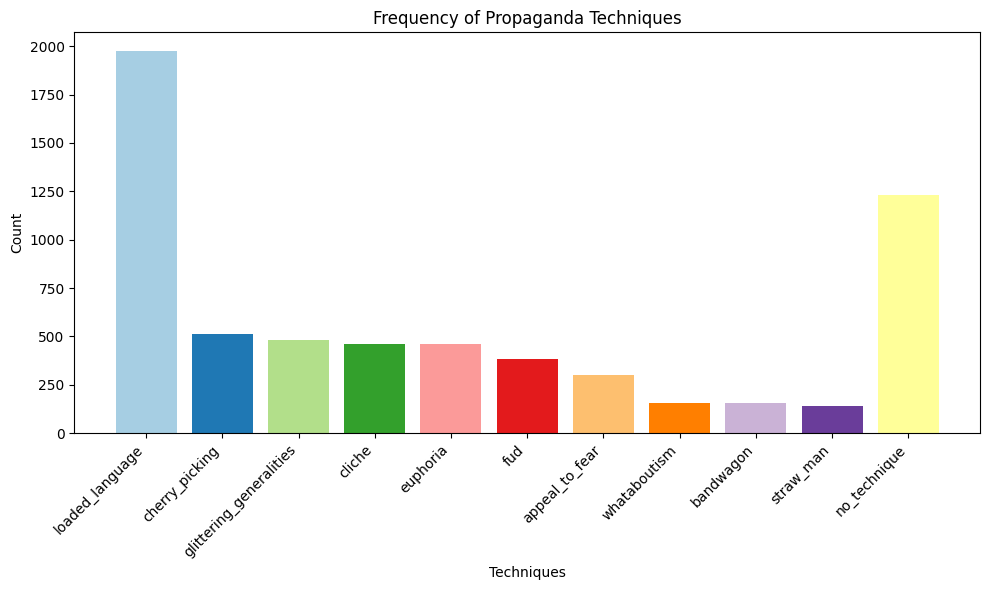

In [49]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(techniques_to_count, technique_counts, color=plt.cm.Paired.colors)

# Adding title and labels
plt.title('Frequency of Propaganda Techniques')
plt.xlabel('Techniques')
plt.ylabel('Count')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()

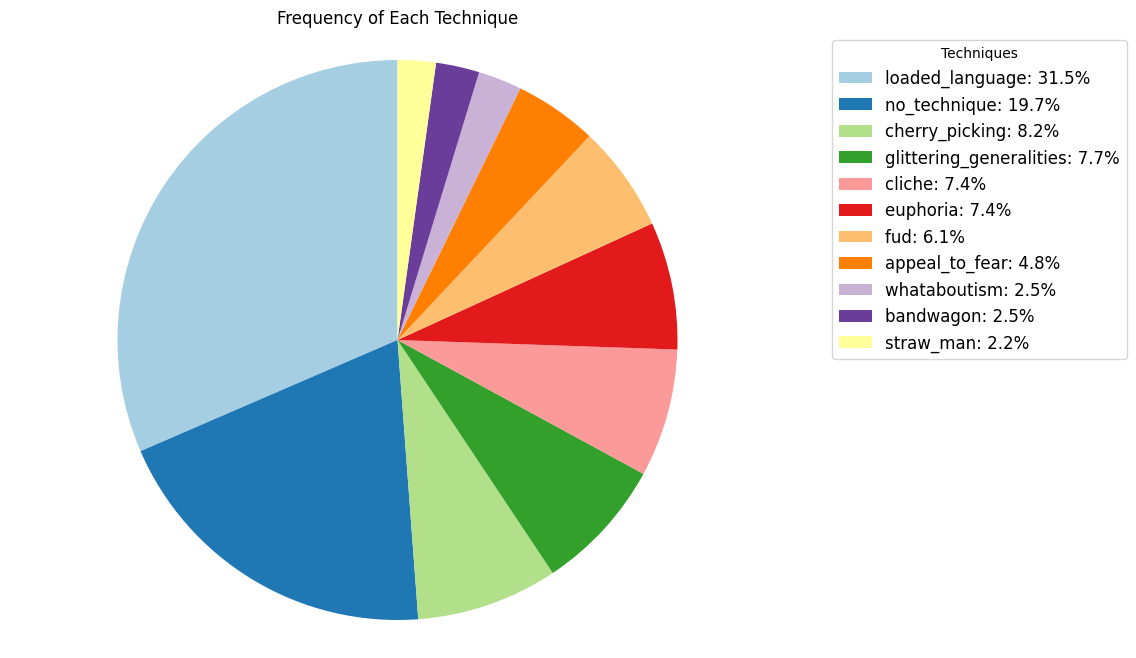

In [50]:
import matplotlib.pyplot as plt

# Get the counts for each technique in the list
technique_counts = [individual_counts.get(technique, 0) for technique in techniques_to_count]

# Get the total count for all techniques
total_count = sum(technique_counts)

# Get the percentage for each technique
technique_percentages = [count / total_count * 100 for count in technique_counts]

# Sort the techniques by count in descending order
sorted_techniques = sorted(zip(techniques_to_count, technique_counts, technique_percentages), key=lambda x: x[1], reverse=True)
sorted_techniques, sorted_counts, sorted_percentages = zip(*sorted_techniques)

# Create the pie chart with only percentages inside
plt.figure(figsize=(10, 8))  # Adjusting pie chart size
plt.pie(sorted_counts, labels=None, startangle=90, colors=plt.cm.Paired.colors, pctdistance=0.85)

# Add title and adjust the chart
plt.title('Frequency of Each Technique')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Add legend with the technique names and percentages
legend_labels = [f'{technique}: {percent:.1f}%' for technique, percent in zip(sorted_techniques, sorted_percentages)]
plt.legend(legend_labels, title="Techniques", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Display the chart
plt.show()


In [44]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset Shape: (3822, 3)

First 5 rows of the dataset:
                                             content  \
0  Новий огляд мапи DeepState від російського вій...   
1  Недавно 95 квартал жёстко поглумился над русск...   
2  🤩\nТим часом йде евакуація Бєлгородського авто...   
3  В Україні найближчим часом мають намір посилит...   
4  Расчёты 122-мм САУ 2С1 "Гвоздика" 132-й бригад...   

                              techniques  content_length  
0        ['euphoria', 'loaded_language']             353  
1  ['loaded_language', 'cherry_picking']            1158  
2        ['loaded_language', 'euphoria']             248  
3                       ['no_technique']             806  
4                    ['loaded_language']             172  


In [45]:
print(df.isnull().sum())

content           0
techniques        0
content_length    0
dtype: int64


In [46]:
df.duplicated().sum()

np.int64(0)

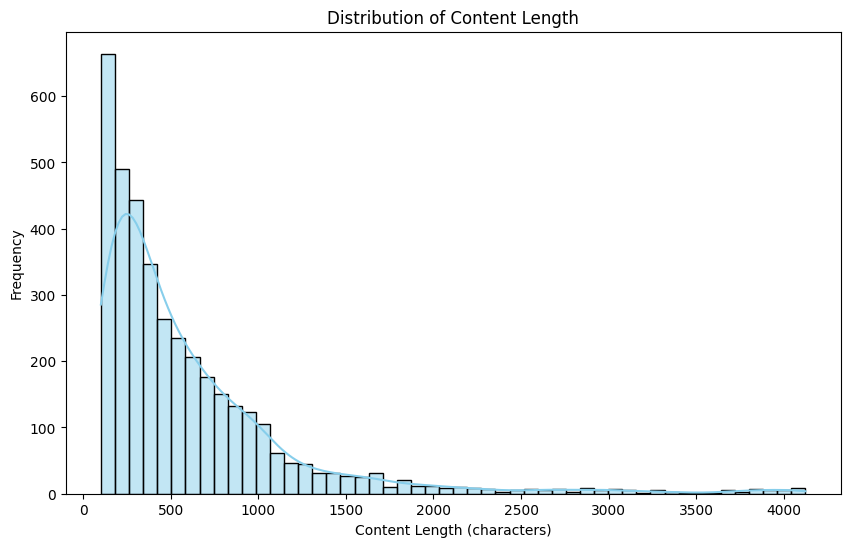

In [47]:
# Text Length Analysis
df['content_length'] = df['content'].apply(len)

# Plotting the distribution of content length
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], kde=True, color='skyblue', bins=50)
plt.title('Distribution of Content Length')
plt.xlabel('Content Length (characters)')
plt.ylabel('Frequency')
plt.show()

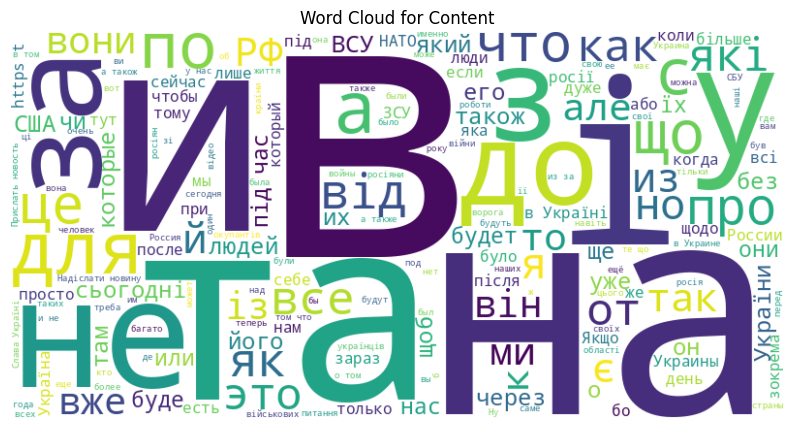

In [48]:
from wordcloud import WordCloud

# Join all text and generate a word cloud
text = ' '.join(df['content'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content')
plt.show()